In [7]:
#gerekli kütüphanelerin kurulumu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#veri setimizi tanımladık
data = pd.read_csv('/content/understat.com.csv')

In [9]:
#veri setindeki ilk 10 satır
data.head(10)

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [10]:
# veri setimizi incelemek için bazı fonksiyonlar
def check_df(data):
  print(">>>>>>>>>>>>>>>>>>>shape<<<<<<<<<<<<<<<<<<<")
  print(data.shape)
  print(">>>>>>>>>>>>>>>>>>>info<<<<<<<<<<<<<<<<<<<")
  print(data.info())
  print(">>>>>>>>>>>>>>>>>>>corr<<<<<<<<<<<<<<<<<<<")
  print(data.corr())
  print(">>>>>>>>>>>>>>>>>>>describe<<<<<<<<<<<<<<<<<<<")
  print(data.describe())
  print(">>>>>>>>>>>>>>>>>>>dtypes<<<<<<<<<<<<<<<<<<<")
  print(data.dtypes)
  print(">>>>>>>>>>>>>>>>>>>columns<<<<<<<<<<<<<<<<<<<")
  print(data.columns)
  print(">>>>>>>>>>>>>>>>>>>head<<<<<<<<<<<<<<<<<<<")
  print(data.head())
  print(">>>>>>>>>>>>>>>>>>>tail<<<<<<<<<<<<<<<<<<<")
  print(data.tail())

check_df(data)

>>>>>>>>>>>>>>>>>>>shape<<<<<<<<<<<<<<<<<<<
(684, 24)
>>>>>>>>>>>>>>>>>>>info<<<<<<<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    684 non-null    object 
 1   Unnamed: 1    684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 n

In [11]:
#Linear regresyon modelimiz için bir tane y bağımlı değişkenimiz olması gerekiyor 
# y bağımlı değişkenimiz scored yani gol sayısı
# x değişkenimiz ise xG yani gol beklentisi
X=data[["xG"]]
y=data[["scored"]]

In [12]:
# Linear regression uygulamak ve veri setimizi test ve train olarak ikiye ayirmak için sklearn kütüphanesinden yararlanıyoruz
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
# veri setimizi test train olarak ayırıp veri boyutumuzu 0.2 verip random state olarak ise 72 verdik
# random state modelimizde aynı sonuçları almamızı sağlar 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=72)

In [14]:
#Linear regression fonksiyonunu tanimlayıp, model oluşturup train verilerimizi modele fit ediyoruz
reg = LinearRegression()
model = reg.fit(X_train,y_train)

In [15]:
# x_train verileri girildiğinde sonuçlari tahmin etmek için predict() metodundan faydalandık
y_train_pred= model.predict(X_train)

In [16]:
# x_test verileri girildiğinde sonuçlari tahmin etmek için predict() metodundan faydalandık
y_test_pred=model.predict(X_test)

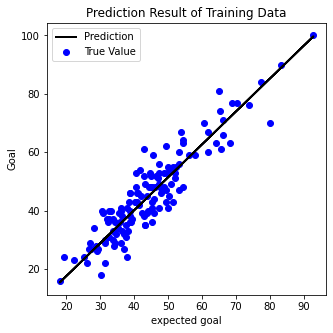

In [21]:
# elde ettiğimiz verileri görselleştirdik
plt.figure(figsize=(5,5))
plt.scatter(X_test,y_test,color="blue",label="True Value")
plt.plot(X_test,y_test_pred, color="black",linewidth=2,label="Prediction")
plt.xlabel("expected goal")
plt.ylabel("Goal")
plt.title("Prediction Result of Training Data")
plt.legend()
plt.show()

In [18]:
#ortalama hata karesi, tahmin ettigimiz degerlerin hatalari karesi
import sklearn.metrics as sm
print("Mean Squared Error= ", round(sm.mean_squared_error(y_test,y_test_pred),2))

Mean Squared Error=  35.0


In [22]:
print("Explain variance Score: ", sm.explained_variance_score(y_test,y_test_pred))

Explain variance Score:  0.8452442672645966


In [23]:
# regresyon modelimiz için uygunluk ölçüsü
print("R2 score",sm.r2_score(y_test,y_test_pred))

R2 score 0.8443510616027727
